In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn.svm
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('../data/water_potability.csv')
# https://www.kaggle.com/datasets/mssmartypants/water-quality/data

# https://www.kaggle.com/datasets/adityakadiwal/water-potability?resource=download


In [3]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [4]:
df = df.dropna(axis=0)
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
 9   Potability       2011 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 172.8 KB


In [6]:

x = np.array(df.drop(['Potability'], axis=1))
y = np.array(df['Potability'].copy())
y = np.where(y <= 0, -1, 1)

from model_selection import positive_negative_check
positive_negative_check(y)

Positive Class [1]: 811 sample.
Negative Class [-1]: 1200 sample.
Total 2011 Samples.


In [7]:
from model_selection import standard_scaler
scaler = standard_scaler(x)

print(scaler)

[[ 0.78227123  0.56397349  0.01168402 ...  1.22672656  2.11112669
   0.8445505 ]
 [ 1.27514575 -0.45553926 -0.45572156 ... -0.84194429 -2.13986642
   0.13499987]
 [-0.95459744 -0.23455578  0.7904486  ... -1.79189439 -0.71424515
  -1.80691678]
 ...
 [ 2.79979552 -3.09959443  1.76706328 ...  0.54588529 -1.54520056
   0.5119978 ]
 [-0.64599909 -0.28524614  0.48845426 ... -0.68875739 -0.37201577
  -0.38446668]
 [-1.53679002 -0.07005761  2.96954849 ... -0.13933734  0.01784123
   0.59728891]]


In [8]:
from model_selection import train_test_split
# from sklearn.model_selection import train_test_split

buff_x, x_test, buff_y, y_test = train_test_split(scaler,y, test_size=0.2, random_state=42)
x_train, x_validate, y_train, y_validate = train_test_split(buff_x,buff_y, test_size=0.2, random_state=42)

# buff_x, x_test, buff_y, y_test = train_test_split(scale,y, test_size=0.2)
# x_train, x_validate, y_train, y_validate = train_test_split(buff_x,buff_y, test_size=0.2)

In [9]:
positive_negative_check(y_validate)

Positive Class [1]: 139 sample.
Negative Class [-1]: 183 sample.
Total 322 Samples.


In [10]:
# model = svm.SVC(kernel='linear' ,C=100)
# model.fit(x_train, y_train)


# # y_pred = model.predict(x_test)
# # for i in y_pred:
# #     print(i)
# print(model.score(x_validate, y_validate))
# print(model.score(x_test, y_test))
# # print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# # print("Precision:",metrics.precision_score(y_test, y_pred, average="weighted"))
# # print("Recall:",metrics.f1_score(y_test, y_pred, average="macro"))
# # print(classification_report(y_test, y_pred))




0.5683229813664596
0.572139303482587


-- Parameter --
C: 1
Learning Rate: 0.001
Lambda Param: 0.01
N_Iters: 11
---------------
Gradient 14157 steps.
0.5683229813664596
0.572139303482587


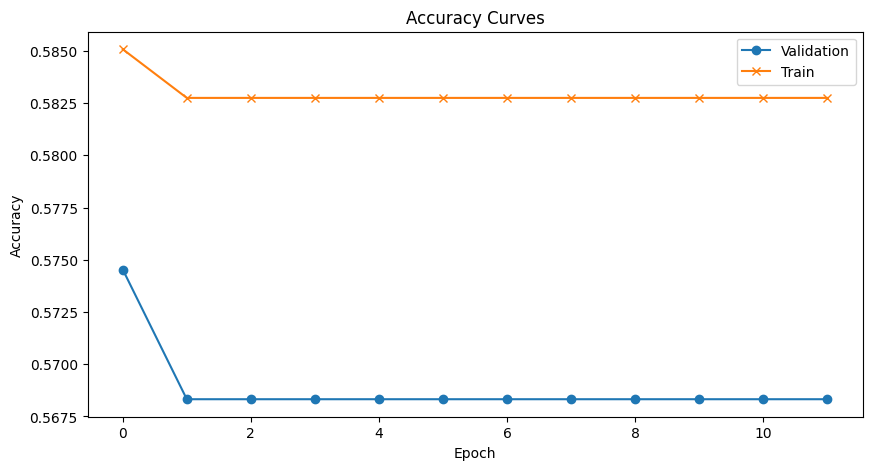

In [11]:
from model import SVM
model2 = SVM(kernel='linear', learning_rate=0.001, max_itr=11, lambda_param=0.01,debug=True)
model2.fit(x_train, y_train)


predict = model2.predict(x_test)
predict_validate = model2.predict(x_validate)

print(model2.score(x_validate, y_validate))
print(model2.score(x_test, y_test))
model2.plot_accuracy(x_train,y_train, x_validate, y_validate)